# Lesson 03 - A Basic Pass/Fail Report  

We'll cover:  
  - Utilizing a `utils.py` script to help reduce code in report
  - Run multiple tests and print out results
  - Display a basic data visualization for relevant data

If you have not done so already please take a look at the previous lessons at <https://www.stoltzmaniac.com/building-a-data-pipeline-in-python-part-3-of-n-testing-data/>

In this example, we are assuming "new data" gets put into a folder and that it is the only file that is dropped in. We are then comparing it to our "test data" which I randomly picked from the original data folder. In practice, you will want your "test data" to be exactly what you want to compare against.

First, import libraries and set yourself up for success.

In [1]:
from os import listdir
import pandas as pd
import seaborn as sns
from utils import read_clean_data, test_columns_and_data_type, test_gte_min_variables, \
                    test_continuous_outlier_variables, TEST_DATA, TEST_CONTINUOUS_VARIABLES

# Assuming you get a single new file placed into "new_data" directory
new_filename = 'new_data/' + listdir('new_data')[0]

%matplotlib inline

Second, read in the new data and create a dictionary to hold test results.

In [2]:
new_data = read_clean_data(new_filename)
my_test_results = dict()

----
We can proceed to run all of our tests:
#### ---- START tests ----

In [3]:
cols_and_dtype = test_columns_and_data_type(new_data)

my_test_results['cols_and_dtype'] = cols_and_dtype

[SUCCESS] - dataframes have same columns and dtypes


In [4]:
gte_min = test_gte_min_variables(new_data)

my_test_results['gte_min'] = gte_min

[SUCCESS] - All ORDERNUMBER >= minimum requirement
[SUCCESS] - All ORDERLINENUMBER >= minimum requirement


In [5]:
outlier_variables = test_continuous_outlier_variables(new_data)

my_test_results['outlier_variables'] = outlier_variables

[SUCCESS] - QUANTITYORDERED - fits the outlier requirements!
[SUCCESS] - PRICEEACH - fits the outlier requirements!
[SUCCESS] - SALES - fits the outlier requirements!
[SUCCESS] - MSRP - fits the outlier requirements!


#### ---- END tests ----

----

#### Visualize distributions of new data vs test data


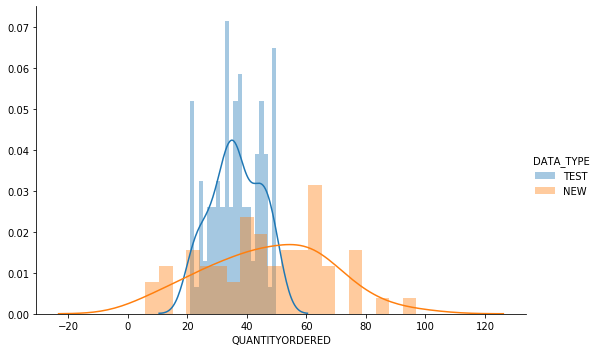

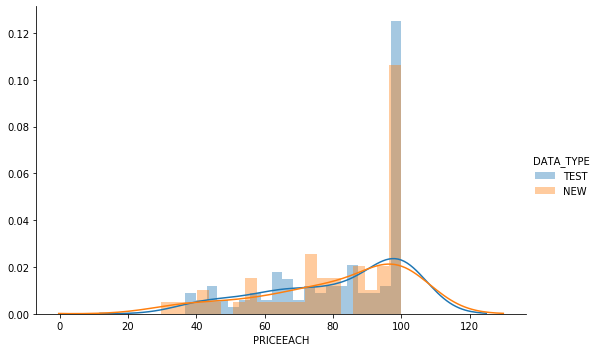

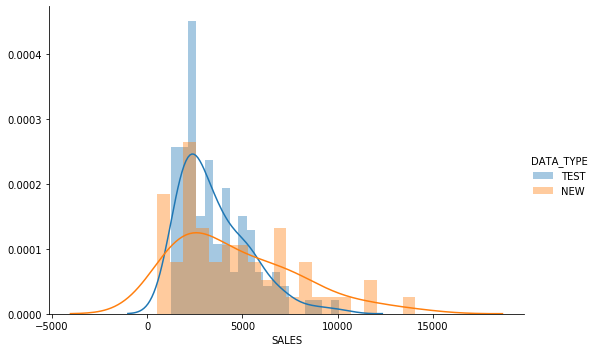

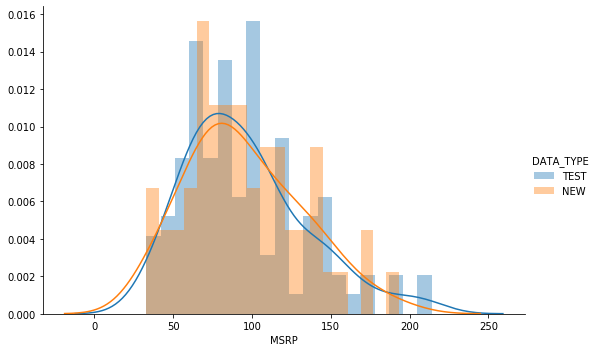

In [6]:
test_data_to_plot = TEST_DATA[TEST_CONTINUOUS_VARIABLES].assign(DATA_TYPE = 'TEST')
new_data_to_plot = new_data[TEST_CONTINUOUS_VARIABLES].assign(DATA_TYPE = 'NEW')
all_data_to_plot = pd.concat([test_data_to_plot, new_data_to_plot])

for variable in TEST_CONTINUOUS_VARIABLES:
    g = sns.FacetGrid(all_data_to_plot, hue = 'DATA_TYPE', height = 5, aspect = 1.5)
    g.map(sns.distplot, variable, bins = 20).add_legend()

#### Show Passing / Failing Tests

In [7]:
for i in my_test_results.items(): 
    print(f'TEST: {i[0]}  ----> PASS: {i[1]}') 

TEST: cols_and_dtype  ----> PASS: True
TEST: gte_min  ----> PASS: True
TEST: outlier_variables  ----> PASS: True
